In [107]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import statsmodels.api as sm 
from scipy import stats
from scipy.stats import norm
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

style.use('ggplot')

### Gathering S&P 500 tickers from wikipedia

In [2]:
import bs4 as bs
import os
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
     
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.replace('\n','')
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker) 
        tickers.append(ticker)
        
        
    
    return tickers

In [3]:
sp500tickers = save_sp500_tickers()

ticker replaced to BRK-B
ticker replaced to BF-B


### gathering individual stock data from yahoo finance

In [126]:
start = '2015-1-1'
end = '2019-12-31'
data = pd.DataFrame()
for t in sp500tickers:
    try:
        data[t] = wb.DataReader(t, 'yahoo', start=start, end=end)['Adj Close']
        print(t)
    except KeyError:
        pass
    

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK-B
BBY
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF-B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HRB
HAL
HBI
HOG
HIG
HAS
HCA
PEAK
HP
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

In [127]:
data.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,142.061066,40.149174,51.718132,37.310001,79.503258,19.261734,72.339996,2.67,156.793335,11.027426,...,129.636993,30.519838,30.425949,38.701111,35.491993,46.193398,77.430000,107.825897,25.758247,41.688309
2015-01-05,138.857193,40.158115,50.744839,37.070000,78.160896,18.993813,71.980003,2.66,154.726624,10.713510,...,127.430626,30.173405,29.762117,37.991001,33.283073,45.254841,76.339996,111.848183,24.793114,41.438049
2015-01-06,137.376526,39.702087,50.493664,36.130001,77.597084,18.639771,70.529999,2.63,154.617828,10.472033,...,124.712402,30.333946,29.363806,37.440662,33.087337,44.699375,75.790001,110.900101,23.846184,41.033775
2015-01-07,138.372314,40.023983,52.534447,37.279999,79.225830,18.237886,71.110001,2.58,157.940414,10.488131,...,128.374954,30.595886,29.739986,37.458416,33.348309,46.180630,77.720001,113.658203,24.073805,41.880825
2015-01-08,141.688721,40.846649,53.083889,38.959999,80.433945,18.419691,72.919998,2.61,159.324844,10.649113,...,129.919449,30.950773,30.558722,38.292793,33.599960,46.985100,79.379997,114.864899,24.410700,42.525730


In [129]:
returns = data.pct_change()
returns.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,-0.010030,-0.000801,-0.004432,0.010913,0.003700,-0.001358,0.002098,0.023757,0.003751,-0.003027,...,-0.005634,0.003913,0.000536,-0.004146,-0.003927,0.005210,-0.009348,-0.002447,0.003701,0.004155
2019-12-26,-0.000509,0.000000,-0.000223,-0.007487,0.002079,0.001360,0.004732,0.001934,-0.008096,0.008603,...,0.010757,-0.001114,0.002944,0.001929,-0.000509,0.014552,0.000354,-0.002191,0.002523,0.000827
2019-12-27,0.003794,0.001375,-0.007013,-0.010175,0.000802,0.005094,-0.001238,-0.009650,-0.005776,0.002509,...,-0.008018,0.005256,-0.004536,-0.002635,0.003053,0.001081,0.006210,-0.001930,-0.003097,0.001654
2019-12-30,-0.008067,-0.006865,-0.007623,-0.011697,-0.007445,-0.005237,-0.007407,-0.014292,0.004863,0.003003,...,-0.003075,0.002693,-0.004317,-0.007519,-0.001268,-0.012365,-0.007383,-0.008399,0.005243,-0.007805
2019-12-31,0.003355,0.000691,0.000226,0.019726,-0.000332,0.009171,0.004477,0.007469,0.006536,-0.006986,...,-0.003659,0.003160,-0.000813,0.000921,0.000635,0.000894,0.005234,0.006252,0.002897,0.001059


### Finding average annual returns and annual risk (standard deviation) of each security

In [130]:
ann_returns_dict = {}
ann_returns_dict['ticker'] = []
ann_returns_dict['annual returns'] = []
ann_returns_dict['annual risk'] = []
for col in returns.columns:
    ann_returns_dict['ticker'].append(col)
    ann_returns_dict['annual returns'].append(returns[col].mean() * 250)
    ann_returns_dict['annual risk'].append(returns[col].std() * 250 ** .5)
ann_returns = pd.DataFrame(ann_returns_dict)
ann_returns.set_index('ticker', inplace=True)
ann_returns_by_return = ann_returns.sort_values(by='annual returns', ascending=False)
ann_returns_by_risk = ann_returns.sort_values(by='annual risk')

In [131]:
ann_returns_by_return.head()

,annual returns,annual risk
ticker,,
TT,210.778697,318.053763
HWM,1.007308,0.173734
AMD,0.763076,0.639253
NVDA,0.585973,0.425494
PAYC,0.544769,0.408835


In [132]:
ann_returns_by_risk.head()

,annual returns,annual risk
ticker,,
KO,0.096644,0.141012
RSG,0.191260,0.141454
PEP,0.113193,0.144117
WM,0.191442,0.147866
SO,0.111957,0.155710


### Dropping risky outliers from dataset

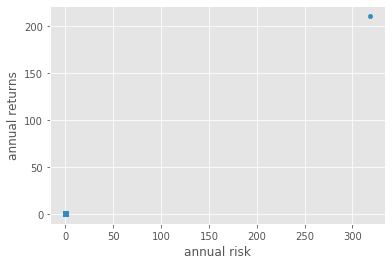

In [133]:
ann_returns.plot.scatter(x='annual risk', y='annual returns')

In [134]:
ann_returns_dropped = ann_returns.drop(labels='TT')

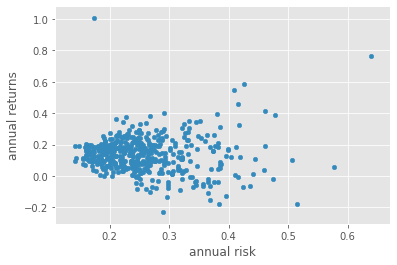

In [135]:
ann_returns_dropped.plot.scatter(x='annual risk', y='annual returns');

In [137]:
ann_returns_dropped['annual risk'].describe()

count    502.000000
mean       0.254983
std        0.072407
min        0.141012
25%        0.201842
50%        0.243062
75%        0.286721
max        0.639253
Name: annual risk, dtype: float64

In [138]:
ann_returns_dropped['annual returns'].describe()

count    502.000000
mean       0.136932
std        0.113140
min       -0.231943
25%        0.074324
50%        0.138865
75%        0.192825
max        1.007308
Name: annual returns, dtype: float64

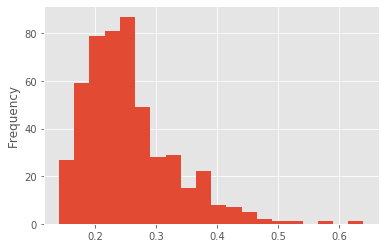

In [139]:
ann_returns_dropped['annual risk'].plot.hist(bins=20)

In [234]:
u = ann_returns_dropped['annual risk'].mean()
stdev = ann_returns_dropped['annual risk'].std()
for t in ann_returns_dropped.index:
    if ann_returns_dropped['annual risk'][t] > (u + 2* stdev):
        ann_returns_dropped.drop(labels=t, inplace=True)

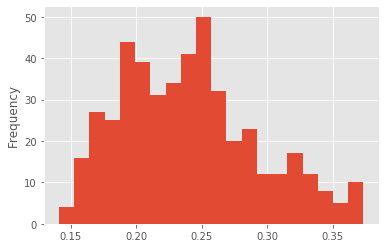

In [235]:
ann_returns_dropped['annual risk'].plot.hist(bins=20)

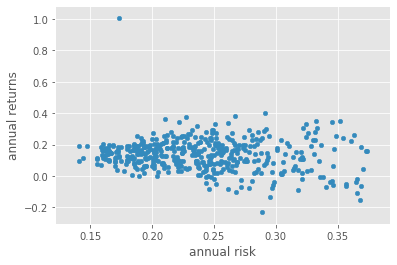

In [236]:
ann_returns_dropped.plot.scatter(x='annual risk', y='annual returns');

### Binning securities by their risk

In [237]:
bin_labels = np.arange(1, 31)
ann_returns_dropped['bin'] = pd.qcut(ann_returns_dropped['annual risk'], q=30, labels=bin_labels)
ann_returns_dropped.head()

,annual returns,annual risk,bin
ticker,,,
MMM,0.060519,0.195070,7
ABT,0.173316,0.206557,10
ABBV,0.141770,0.283142,25
ACN,0.210697,0.192523,7
ATVI,0.275947,0.326285,28


In [238]:
my_list = []
my_list.append(ann_returns_dropped.loc['ZTS'])
my_list.append(ann_returns_dropped.loc['YUM'])


In [239]:
sort = ann_returns_dropped.sort_values(by=['bin', 'annual returns'], ascending=False)
my_dict = {}
for b in bin_labels:
    my_dict[b] = []
for index, row in sort.iterrows():
    my_dict[sort.loc[index]['bin']].append(sort.loc[index])

In [240]:
my_dict

{1: [annual returns    0.206535
  annual risk       0.160707
  bin                      1
  Name: NEE, dtype: object, annual returns    0.191442
  annual risk       0.147866
  bin                      1
  Name: WM, dtype: object, annual returns     0.19126
  annual risk       0.141454
  bin                      1
  Name: RSG, dtype: object, annual returns    0.181282
  annual risk       0.158896
  bin                      1
  Name: AJG, dtype: object, annual returns    0.177669
  annual risk       0.161917
  bin                      1
  Name: WRB, dtype: object, annual returns    0.167858
  annual risk       0.159897
  bin                      1
  Name: MMC, dtype: object, annual returns    0.157392
  annual risk       0.160698
  bin                      1
  Name: XEL, dtype: object, annual returns    0.134333
  annual risk       0.159898
  bin                      1
  Name: AEP, dtype: object, annual returns    0.128422
  annual risk       0.160114
  bin                      1
  Name:

### Selecting highest returning security from each risk bin for the portfolio

In [241]:
portfolio_securities = []
for key in my_dict.keys():
    portfolio_securities.append(my_dict[key][0].name)

In [242]:
portfolio_securities

['NEE',
 'AWK',
 'HWM',
 'SYY',
 'FISV',
 'PGR',
 'INFO',
 'CTAS',
 'V',
 'SNPS',
 'LW',
 'CPRT',
 'ANSS',
 'MSCI',
 'CDW',
 'NVR',
 'LDOS',
 'TDG',
 'GPN',
 'ODFL',
 'ADBE',
 'MKTX',
 'CHTR',
 'IDXX',
 'AMZN',
 'EW',
 'EA',
 'LRCX',
 'TTWO',
 'NOW']

In [243]:
portfolio_prices = pd.DataFrame()
for a in portfolio_securities:
    portfolio_prices[a] = data[a]
portfolio_prices.tail()

,NEE,AWK,HWM,SYY,FISV,PGR,INFO,CTAS,V,SNPS,...,ADBE,MKTX,CHTR,IDXX,AMZN,EW,EA,LRCX,TTWO,NOW
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,239.260452,120.605164,NaN,84.018044,116.629997,71.680511,74.782951,268.809998,186.985657,138.210007,...,329.640015,372.978668,480.859985,263.260010,1789.209961,235.789993,108.550003,292.723969,123.930000,284.200012
2019-12-26,240.702927,120.862984,NaN,84.175484,116.029999,71.540878,74.663506,268.130005,188.570694,140.070007,...,331.200012,374.992737,485.730011,261.429993,1868.770020,235.779999,108.510002,293.161346,123.989998,286.200012
2019-12-27,241.250061,121.933968,NaN,84.372299,117.080002,71.959763,75.290596,269.010010,188.799973,140.619995,...,330.790009,373.895966,483.690002,263.980011,1869.800049,234.610001,108.430000,291.948608,124.470001,286.880005
2019-12-30,240.036407,122.023224,NaN,84.431343,115.470001,72.129318,74.444527,268.359985,187.244843,139.100006,...,328.339996,373.397430,483.079987,261.600006,1846.890015,232.419998,106.930000,290.795532,122.349998,282.809998
2019-12-31,240.901886,121.824890,NaN,84.175484,115.629997,72.199135,75.001930,269.079987,187.314606,139.199997,...,329.809998,377.993835,485.079987,261.130005,1847.839966,233.289993,107.510002,290.656342,122.430000,282.320007


In [244]:
asset_returns = portfolio_prices.pct_change()
asset_returns.tail()

,NEE,AWK,HWM,SYY,FISV,PGR,INFO,CTAS,V,SNPS,...,ADBE,MKTX,CHTR,IDXX,AMZN,EW,EA,LRCX,TTWO,NOW
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,0.007245,0.001895,0.0,0.000938,0.002579,0.002511,-0.003713,-0.007568,0.002619,-0.012151,...,0.002098,0.007324,0.000291,-0.002727,-0.002114,-0.006447,0.007051,0.000102,0.014821,0.003141
2019-12-26,0.006029,0.002138,0.0,0.001874,-0.005144,-0.001948,-0.001597,-0.002530,0.008477,0.013458,...,0.004732,0.005400,0.010128,-0.006951,0.044467,-0.000042,-0.000369,0.001494,0.000484,0.007037
2019-12-27,0.002273,0.008861,0.0,0.002338,0.009049,0.005855,0.008399,0.003282,0.001216,0.003927,...,-0.001238,-0.002925,-0.004200,0.009754,0.000551,-0.004962,-0.000737,-0.004137,0.003871,0.002376
2019-12-30,-0.005031,0.000732,0.0,0.000700,-0.013751,0.002356,-0.011237,-0.002416,-0.008237,-0.010809,...,-0.007407,-0.001333,-0.001261,-0.009016,-0.012253,-0.009335,-0.013834,-0.003950,-0.017032,-0.014187
2019-12-31,0.003606,-0.001625,0.0,-0.003030,0.001386,0.000968,0.007488,0.002683,0.000373,0.000719,...,0.004477,0.012310,0.004140,-0.001797,0.000514,0.003743,0.005424,-0.000479,0.000654,-0.001733


### Simulating 1000 different portfolios (same securities different weights) and finding the annual risk and return of each potential portfolio

In [245]:
num_assets = len(portfolio_securities)
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []
for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * asset_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(asset_returns.cov() * 250, weights))))
    portfolio_weights.append(weights)

In [246]:
portfolio_frontier = pd.DataFrame()
portfolio_frontier['returns'] = portfolio_returns
portfolio_frontier['volatility'] = portfolio_volatilities
portfolio_frontier['weights'] = portfolio_weights
portfolio_frontier.tail()

,returns,volatility,weights
995,0.326307,0.143940,"[0.021115819519812798, 0.03268427412414168, 0...."
996,0.297970,0.147867,"[0.009634484230915053, 0.046735832596635274, 0..."
997,0.327999,0.139328,"[0.019133180942069224, 0.05080447547863714, 0...."
998,0.299886,0.141698,"[0.026668856206182916, 0.022464773696423686, 0..."
999,0.297397,0.137801,"[0.04564530742695533, 0.031077283740011948, 0...."


In [247]:
portfolio_frontier['returns'].describe()

count    1000.000000
mean        0.310908
std         0.015701
min         0.272770
25%         0.298317
50%         0.310252
75%         0.323532
max         0.356142
Name: returns, dtype: float64

In [248]:
portfolio_frontier['volatility'].describe()

count    1000.000000
mean        0.142992
std         0.005269
min         0.126663
25%         0.139452
50%         0.142723
75%         0.146381
max         0.161907
Name: volatility, dtype: float64

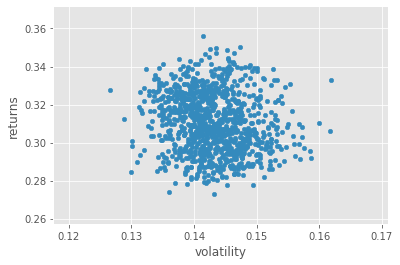

In [249]:
portfolio_frontier.plot(x='volatility', y='returns', kind='scatter');

In [250]:
X = portfolio_frontier['volatility']
Y = portfolio_frontier['returns']
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [251]:
m = slope

In [252]:
b = intercept

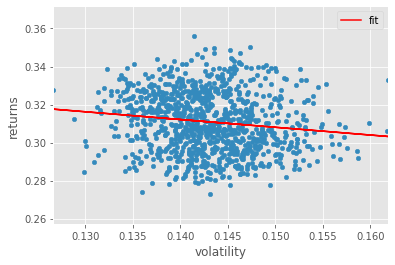

In [253]:
portfolio_frontier['fit'] = m*X + b
ax = portfolio_frontier.plot(x='volatility', y='returns', kind='scatter')
portfolio_frontier.plot.line(x='volatility', y='fit', c='red', ax=ax);

### Finding weighted portfolio with highest return above expected return for a portfolio at it's risk level

In [254]:
portfolio_frontier['residual'] = portfolio_frontier['returns'] - portfolio_frontier['fit']
portfolio_frontier.sort_values(by=['residual', 'volatility'], ascending=False, inplace=True)
portfolio_frontier.reset_index(drop=True, inplace=True)
portfolio_frontier.head()

,returns,volatility,weights,fit,residual
0,0.356142,0.141442,"[0.01267589508801188, 0.024015190423635466, 0....",0.311540,0.044602
1,0.350161,0.147367,"[0.010605567235132724, 0.028693422608617916, 0...",0.309124,0.041036
2,0.349752,0.143543,"[0.049224157007374564, 0.01902895215720032, 0....",0.310683,0.039069
3,0.348741,0.145238,"[0.011113942990798467, 0.046511554500879834, 0...",0.309992,0.038749
4,0.349351,0.142619,"[0.012434406956324284, 0.0016078530391028182, ...",0.311060,0.038291


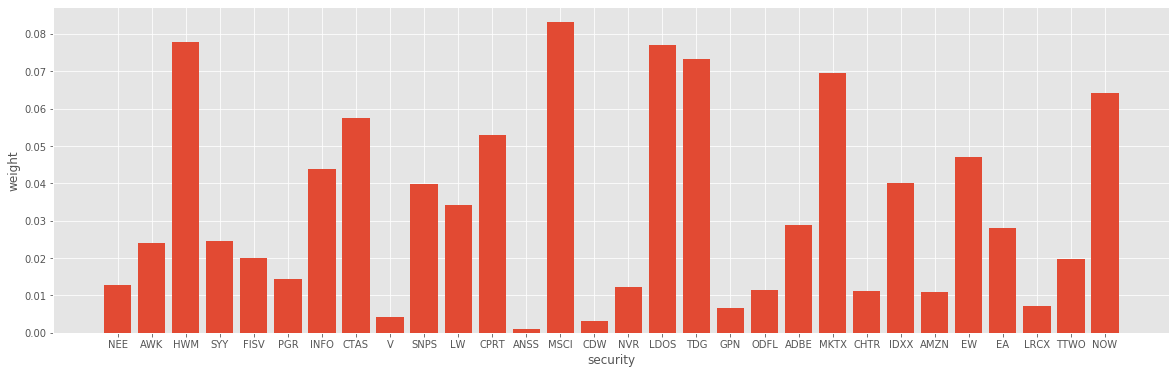

In [255]:
final_weights = portfolio_frontier['weights'][0]
x = portfolio_securities
y = final_weights
plt.figure(figsize=(20,6))
plt.bar(x, y)
plt.xlabel('security')
plt.ylabel('weight');

### Finding daily return and price of portfolio (price normalized to 100)

In [256]:
weighted_returns = weights * asset_returns
weighted_returns

,NEE,AWK,HWM,SYY,FISV,PGR,INFO,CTAS,V,SNPS,...,ADBE,MKTX,CHTR,IDXX,AMZN,EW,EA,LRCX,TTWO,NOW
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.000483,-0.000478,NaN,-0.000253,-0.000280,-0.000294,-0.000743,-0.000848,-0.000584,-3.770615e-05,...,-7.103216e-05,-0.000491,-0.002070,-0.000069,-0.001079,0.000026,-0.000413,-9.734464e-05,-0.000377,-0.000052
2015-01-06,0.000177,0.000082,NaN,-0.000138,0.000025,-0.000327,-0.000416,-0.000091,-0.000170,-2.592332e-05,...,-2.875392e-04,-0.000489,-0.001517,0.000032,-0.001201,-0.000334,-0.000845,-1.330918e-04,0.000248,-0.000185
2015-01-07,0.000418,0.000397,NaN,0.000758,0.000336,0.000551,0.001049,-0.000242,0.000354,3.441645e-06,...,1.173802e-04,0.000229,0.000178,0.000202,0.000558,0.001316,0.001193,4.132839e-05,0.000134,0.000174
2015-01-08,0.000277,0.000121,NaN,0.000468,0.000503,0.000530,0.000548,0.000767,0.000355,4.468918e-05,...,3.633179e-04,0.001276,0.002279,0.000073,0.000360,0.001359,0.001819,2.066053e-04,0.000283,0.000406
2015-01-09,-0.000403,0.000092,NaN,0.000076,-0.000072,-0.000558,-0.000137,-0.000365,-0.000392,4.739661e-06,...,-2.114060e-04,-0.000067,-0.000342,-0.000056,-0.000618,0.000004,-0.000831,1.502859e-05,-0.000458,-0.000391
2015-01-12,-0.000116,-0.000097,NaN,-0.000238,-0.000034,-0.000374,-0.000460,-0.000296,-0.000052,-2.906774e-05,...,-1.430546e-04,-0.000185,0.000671,0.000085,-0.000978,0.000897,-0.000611,-2.420106e-04,0.000000,0.000244
2015-01-13,0.000180,0.000069,NaN,-0.000076,0.000086,-0.000040,0.000456,0.000535,0.000077,-6.828224e-06,...,-1.063724e-04,0.000579,0.000195,0.000313,0.000601,-0.000692,-0.000877,-7.735021e-05,-0.000143,-0.000204
2015-01-14,0.000282,0.000550,NaN,-0.000305,-0.000147,-0.000469,-0.000541,0.000036,-0.000529,-1.163567e-05,...,-1.213239e-04,0.000122,-0.002216,0.000285,-0.000262,-0.000819,0.000667,-5.311159e-05,0.000120,-0.000209


In [386]:
portfolio_data = pd.DataFrame()
dates = []
returns = []
for date in weighted_returns.index:
    dates.append(date)
    returns.append(np.sum(weighted_returns.loc[date]))

In [388]:
import statistics
statistics.mean(returns) * 250

0.27073174930450067

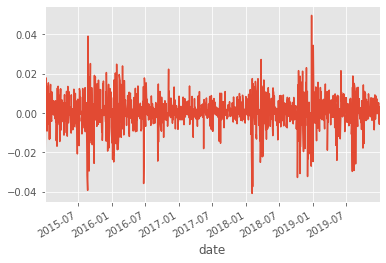

In [434]:
portfolio_data['date'] = dates
portfolio_data['return'] = returns
past_returns = (portfolio_data['return'].copy() + 1)
portfolio_data.set_index('date', inplace=True)
portfolio_data['return'].plot();

In [390]:
past_prices = np.zeros_like(portfolio_data)
S0 = 100
past_prices[0] = S0

In [391]:
for i in range(1, len(portfolio_data)):
    past_prices[i] = past_prices[i-1] * past_returns[i]

<Figure size 720x432 with 0 Axes>

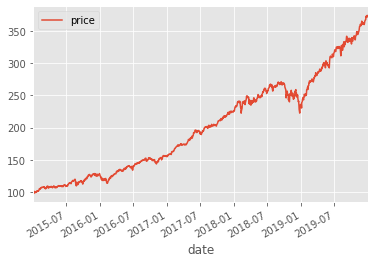

In [392]:
portfolio_data['price'] = past_prices
plt.figure(figsize=(10,6))
portfolio_data.plot(y='price');

### Using monte carlo simulation to simulate portfolio's performance over the next 4 years

In [393]:
u = ((portfolio_data['return'])).mean()
u

0.0010829269972180045

In [394]:
var = ((portfolio_data['return'])).var()
var

7.42182153269391e-05

In [395]:
drift = u - (0.5 * var)
drift = np.array(drift)

In [396]:
stdev = (portfolio_data['return']-1).std()
stdev = np.array(stdev)

In [397]:
t_intervals = 1000
iterations = 50

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99903209, 1.00791278, 1.00356111, ..., 0.99262684, 1.00307232,
        1.00326528],
       [0.99875142, 0.99057052, 0.99254628, ..., 1.01030744, 0.99525995,
        0.99595791],
       [0.99713371, 1.01607239, 0.98895802, ..., 1.01145078, 0.98941409,
        0.99721451],
       ...,
       [1.00923386, 0.99483554, 1.00915831, ..., 0.99782134, 1.01359372,
        0.99445161],
       [0.99205052, 0.98380705, 1.00090822, ..., 0.99986781, 1.00202073,
        0.99701006],
       [0.9985445 , 0.99779777, 1.00102625, ..., 1.00602216, 0.99905435,
        0.99621473]])

In [398]:
S0 = 100
S0

100

In [399]:

price_list = np.zeros_like(daily_returns)
price_list[0] = S0
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [400]:
price_list

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 99.87514195,  99.05705228,  99.2546283 , ..., 101.03074447,
         99.52599468,  99.59579097],
       [ 99.58887057, 100.64913546,  98.15866082, ..., 102.18762505,
         98.47242139,  99.31836779],
       ...,
       [258.06901053, 223.33686413, 406.47059635, ..., 303.89700171,
        297.39042049, 263.04630328],
       [256.01749599, 219.72038045, 406.83976103, ..., 303.85682958,
        297.99136595, 262.25981182],
       [255.64486332, 219.23650673, 407.25728141, ..., 305.68670291,
        297.7095716 , 261.26708873]])

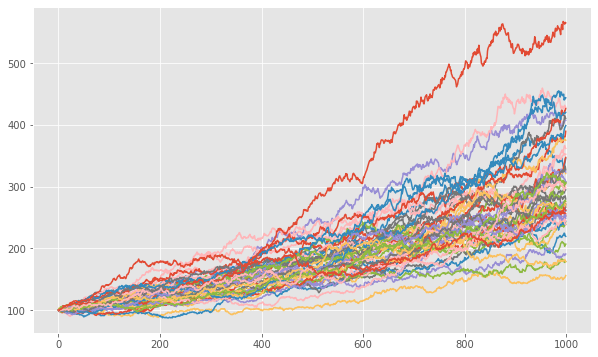

In [401]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [402]:
price_list[0]

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100.])

In [403]:
expected_y_returns= (price_list[-1]/price_list[0] -1) / 4
expected_y_returns

array([0.38911216, 0.29809127, 0.7681432 , 0.51997414, 0.55248464,
       0.51210806, 0.82057089, 0.41636995, 0.61360955, 0.37046856,
       0.77635484, 0.13935805, 0.34636206, 0.654366  , 0.61781436,
       0.40125674, 0.55863017, 0.42517284, 0.35352736, 0.26663007,
       0.63091434, 0.72367979, 0.35934034, 0.22665503, 0.48662677,
       0.68780247, 0.19675676, 0.50676405, 0.81548337, 0.85943088,
       0.51770882, 0.42942054, 0.43782536, 0.51612959, 0.361924  ,
       0.38167749, 0.74667095, 0.40584412, 0.56802665, 0.42815085,
       0.44090344, 0.34547351, 1.16285061, 0.80063481, 0.37865293,
       0.44945752, 0.19535361, 0.51421676, 0.49427393, 0.40316772])

In [404]:
max(expected_y_returns)

1.1628506075868146

In [405]:
min(expected_y_returns)

0.13935804845575334

In [406]:
expected_y_returns.mean()

0.5054444384044326

### Using monte carlo simulation to simulate S&P 500 index performance over the next 4 years

In [408]:
sp_data = pd.DataFrame()
sp_data['sp500'] = wb.DataReader('^GSPC', 'yahoo', start=start, end=end)['Adj Close']
sp_data.tail()

,sp500
Date,
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020
2019-12-30,3221.290039
2019-12-31,3230.780029


In [409]:
returns = sp_data.pct_change()
returns.tail()

,sp500
Date,
2019-12-24,-0.000195
2019-12-26,0.005128
2019-12-27,0.000034
2019-12-30,-0.005781
2019-12-31,0.002946


In [410]:
returns['sp500'].describe()

count    1257.000000
mean        0.000395
std         0.008466
min        -0.040979
25%        -0.002944
50%         0.000493
75%         0.004636
max         0.049594
Name: sp500, dtype: float64

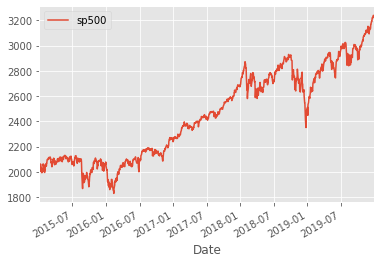

In [411]:
sp_data.plot()

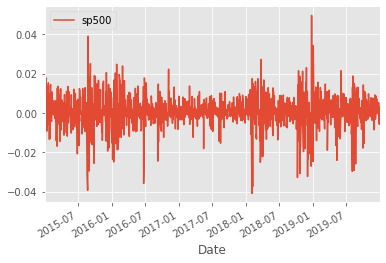

In [413]:
returns.plot();

In [416]:
u = returns.mean()
u

sp500    0.000395
dtype: float64

In [418]:
var = returns.var()
var

sp500    0.000072
dtype: float64

In [419]:
drift = u -(0.5 * var)

In [420]:
stdev = returns.std()

In [422]:
t_intervals = 1000
iterations = 50

sp_daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [423]:
sp_daily_returns

array([[1.0014139 , 0.98214888, 1.00090952, ..., 1.00056711, 1.00060957,
        0.99377382],
       [0.99662727, 1.00440932, 0.99658451, ..., 1.00779029, 1.01250449,
        0.99461666],
       [0.99429948, 1.00167641, 1.00621527, ..., 0.99590217, 0.98605025,
        1.00979249],
       ...,
       [0.99030344, 0.98992184, 0.99550074, ..., 0.9974889 , 1.00350484,
        0.99743488],
       [1.00605238, 1.00731618, 1.0029921 , ..., 0.9862545 , 1.00087003,
        1.00563798],
       [0.98988843, 0.99754419, 0.99695563, ..., 0.99802691, 0.99824857,
        1.0026767 ]])

In [425]:
S0 = 100
sp_price_list = np.zeros_like(sp_daily_returns)
sp_price_list[0] = S0
for t in range(1, t_intervals):
    sp_price_list[t] = sp_price_list[t - 1] * sp_daily_returns[t]

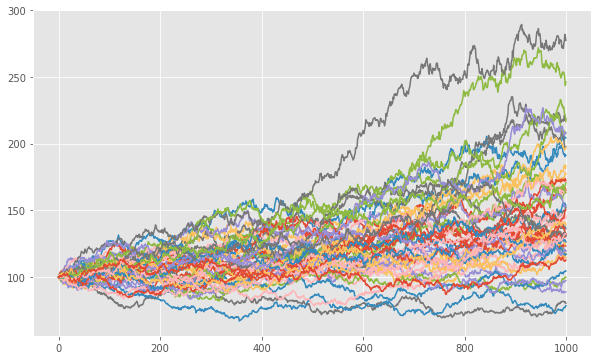

In [427]:
plt.figure(figsize=(10,6))
plt.plot(sp_price_list);

In [428]:
expected_sp_returns= (sp_price_list[-1]/sp_price_list[0] -1) / 4
expected_sp_returns

array([ 0.16273109,  0.22838758,  0.04894016, -0.0489624 ,  0.19309638,
        0.04240207,  0.03606152,  0.18060235,  0.26101492,  0.04330211,
        0.09041341,  0.04421061,  0.36601113,  0.11341552,  0.05821054,
       -0.05372105, -0.02775481,  0.24401725,  0.24301965,  0.1767776 ,
        0.07344525,  0.07909503,  0.13459812,  0.13124298,  0.13000313,
        0.0667326 , -0.00053985,  0.15981208,  0.08093245,  0.01112525,
       -0.00667264,  0.29662163,  0.2082445 ,  0.26905394,  0.06458475,
        0.08136112,  0.0435865 ,  0.04875864,  0.44387922,  0.03615014,
        0.29162796,  0.11016962,  0.12635057,  0.06636694,  0.27045949,
        0.07663696,  0.09759487,  0.15788262,  0.08087121,  0.0316691 ])

In [429]:
max(expected_sp_returns)

0.4438792204295481

In [430]:
min(expected_sp_returns)

-0.05372105491321527

In [431]:
expected_sp_returns.mean()

0.12127639530238453